In [ ]:
PROBLEM STATEMENT: Predict the Tsunami 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data=pd.read_csv("earthquake_data_tsunami.csv")

In [14]:
data.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


In [15]:
data.shape

(782, 13)

In [16]:
data.drop(["nst","dmin","Year","Month"], axis=1, inplace=True)

In [17]:
data.drop("gap", axis=1,inplace=True)

In [18]:
data.head()

,magnitude,cdi,mmi,sig,depth,latitude,longitude,tsunami
0,7.0,8,7,768,14.000,-9.7963,159.596,1
1,6.9,4,4,735,25.000,-4.9559,100.738,0
2,7.0,3,3,755,579.000,-20.0508,-178.346,1
3,7.3,5,5,833,37.000,-19.2918,-172.129,1
4,6.6,0,2,670,624.464,-25.5948,178.278,1


In [20]:
data.describe()

,magnitude,cdi,mmi,sig,depth,latitude,longitude,tsunami
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,870.108696,75.883199,3.538100,52.609199,0.388747
std,0.445514,3.169939,1.462724,322.465367,137.277078,27.303429,117.898886,0.487778
min,6.500000,0.000000,1.000000,650.000000,2.700000,-61.848400,-179.968000,0.000000
25%,6.600000,0.000000,5.000000,691.000000,14.000000,-14.595600,-71.668050,0.000000
50%,6.800000,5.000000,6.000000,754.000000,26.295000,-2.572500,109.426000,0.000000
75%,7.100000,7.000000,7.000000,909.750000,49.750000,24.654500,148.941000,1.000000
max,9.100000,9.000000,9.000000,2910.000000,670.810000,71.631200,179.662000,1.000000


EDA

To check if target is skewed or not

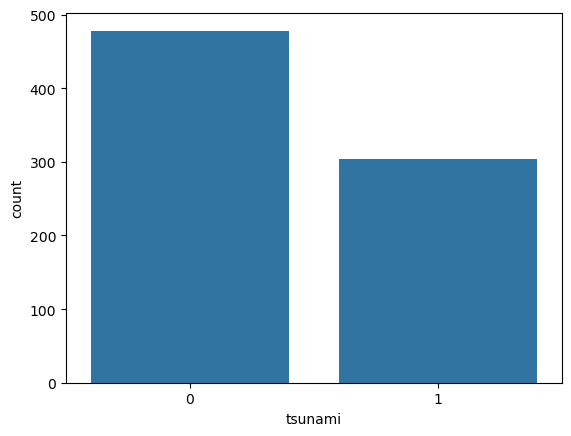

In [21]:
sns.countplot(x='tsunami', data=data)
plt.show()

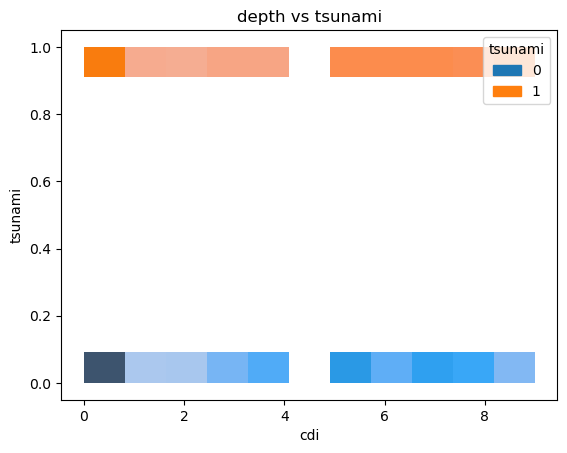

In [24]:
sns.histplot(x='cdi', y='tsunami', data=data, hue= "tsunami" )
plt.title('depth vs tsunami')
plt.show()


<Axes: xlabel='tsunami', ylabel='magnitude'>

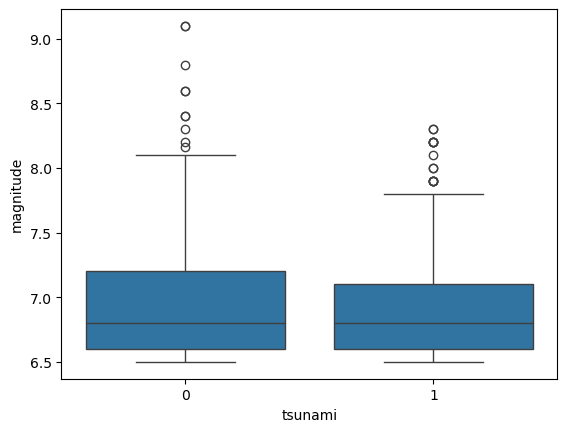

In [25]:
sns.boxplot(x='tsunami', y='magnitude', data=data)


The median magnitude of earthquakes that generated tsunamis is slightly higher than those that did not. However, there is considerable overlap, indicating that magnitude alone does not determine tsunami occurrence; other factors such as depth and location likely play a significant role

<Axes: xlabel='depth', ylabel='magnitude'>

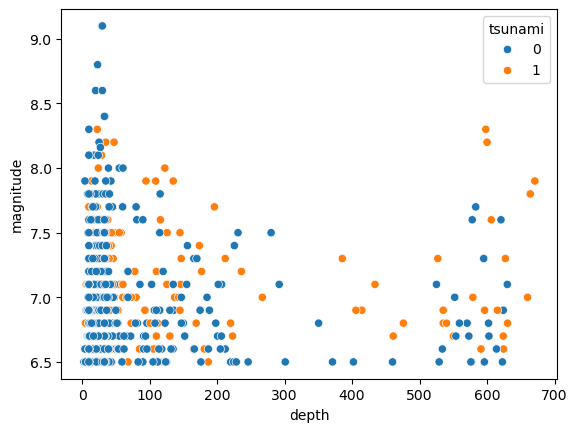

In [26]:
sns.scatterplot(x='depth', y='magnitude', hue='tsunami', data=data)


<Axes: xlabel='sig', ylabel='magnitude'>

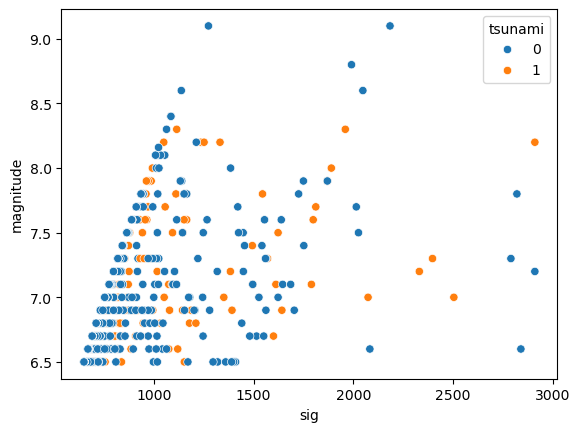

In [27]:
sns.scatterplot(x='sig', y='magnitude', hue='tsunami', data=data)


<Axes: xlabel='tsunami', ylabel='mmi'>

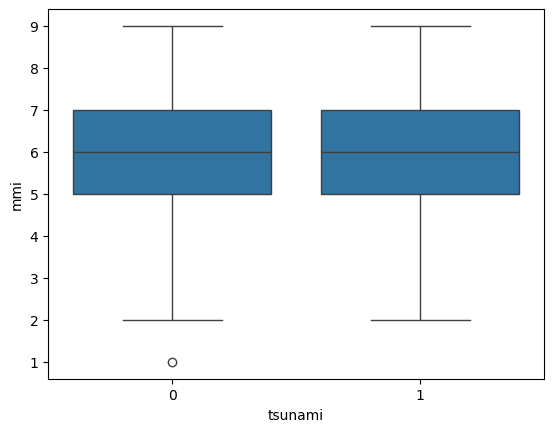

In [28]:
sns.boxplot(x='tsunami', y='mmi', data=data)


Higher MMI values (stronger ground shaking) show a positive association with tsunami occurrence.

<Axes: xlabel='cdi', ylabel='mmi'>

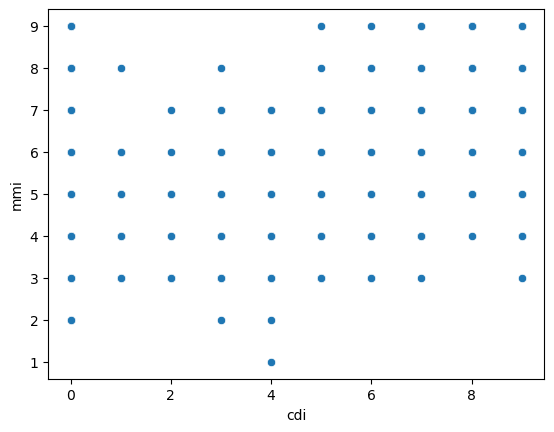

In [29]:
sns.scatterplot(x='cdi', y='mmi', data=data)


CDI and MMI show a positive linear trend, indicating that stronger ‘felt intensity’ corresponds with scientifically measured shaking intensity.

<Axes: xlabel='tsunami', ylabel='sig'>

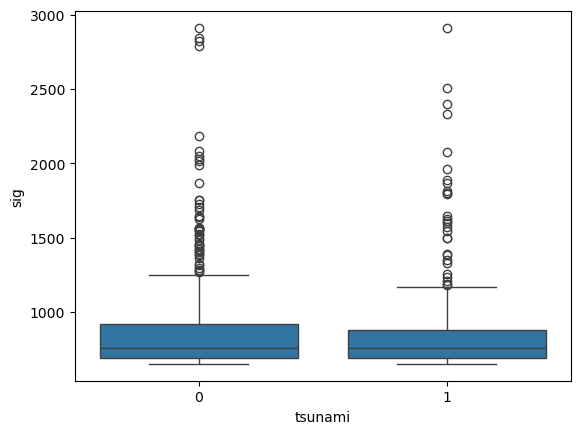

In [30]:
sns.boxplot(x='tsunami', y='sig', data=data)


The significance score (sig) shows similar distributions for both tsunami and non-tsunami earthquakes. The median values are nearly identical, and both categories contain many high-value outliers. This indicates that sig alone is not a strong predictor of tsunami occurrence, and tsunamis depend on more complex combinations of factors such as depth, magnitude, and location.

<Axes: xlabel='longitude', ylabel='latitude'>

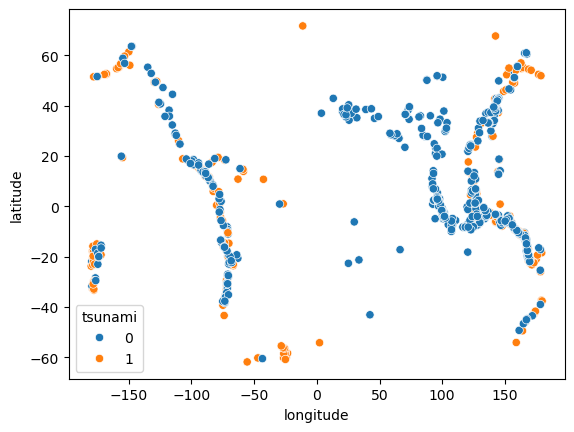

In [31]:
sns.scatterplot(x='longitude', y='latitude', hue='tsunami', data=data)


<Axes: >

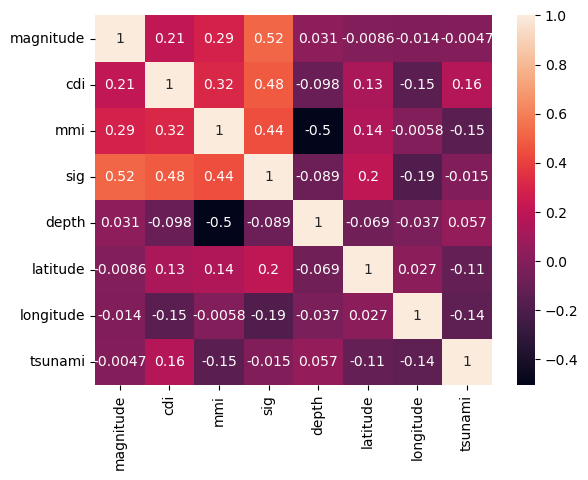

In [33]:
sns.heatmap(data.corr(), annot=True)


Magnitude, MMI, and significance (sig) show moderate positive correlations (r ≈ 0.4–0.52), meaning stronger earthquakes typically generate higher shaking intensity and significance scores. Depth shows a moderate negative correlation with MMI (r = –0.50), indicating shallow earthquakes tend to cause stronger shaking. However, the tsunami variable shows only very weak correlations with all features, suggesting that tsunami occurrence cannot be predicted from a single factor and requires a combination of variables.

In [ ]:
LOGISTIC REGRESSION

In [34]:
data['tsunami'].value_counts()


tsunami
0    478
1    304
Name: count, dtype: int64

In [36]:
data.head()

,magnitude,cdi,mmi,sig,depth,latitude,longitude,tsunami
0,7.0,8,7,768,14.000,-9.7963,159.596,1
1,6.9,4,4,735,25.000,-4.9559,100.738,0
2,7.0,3,3,755,579.000,-20.0508,-178.346,1
3,7.3,5,5,833,37.000,-19.2918,-172.129,1
4,6.6,0,2,670,624.464,-25.5948,178.278,1


In [37]:
X=data.drop("tsunami", axis=1)
y=data["tsunami"]

In [38]:
X

,magnitude,cdi,mmi,sig,depth,latitude,longitude
0,7.0,8,7,768,14.000,-9.7963,159.596
1,6.9,4,4,735,25.000,-4.9559,100.738
2,7.0,3,3,755,579.000,-20.0508,-178.346
3,7.3,5,5,833,37.000,-19.2918,-172.129
4,6.6,0,2,670,624.464,-25.5948,178.278
...,...,...,...,...,...,...,...
777,7.7,0,8,912,60.000,13.0490,-88.660
778,6.9,5,7,745,36.400,56.7744,-153.281
779,7.1,0,7,776,103.000,-14.9280,167.170
780,6.8,0,5,711,33.000,6.6310,126.899


In [39]:
y

0      1
1      0
2      1
3      1
4      1
      ..
777    0
778    0
779    0
780    0
781    0
Name: tsunami, Length: 782, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                test_size=0.2,random_state=10)

SCALING

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Create and train logistic regression model
lr_clf = LogisticRegression()
lr_clf.fit(X_train_scaled, y_train)

# Predictions
y_pred = lr_clf.predict(X_test_scaled)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Logistic Regression Results:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Logistic Regression Results:
Accuracy: 0.5732484076433121
Precision: 0.5294117647058824
Recall: 0.2608695652173913
F1 Score: 0.34951456310679613

Confusion Matrix:
[[72 16]
 [51 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.82      0.68        88
           1       0.53      0.26      0.35        69

    accuracy                           0.57       157
   macro avg       0.56      0.54      0.52       157
weighted avg       0.56      0.57      0.54       157



RANDOM FOREST

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np


rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("\n===== RANDOM FOREST RESULTS =====")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Precision:", precision_score(y_test, rf_pred))
print("Recall:", recall_score(y_test, rf_pred))
print("F1:", f1_score(y_test, rf_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))







===== RANDOM FOREST RESULTS =====
Accuracy: 0.6496815286624203
Precision: 0.6521739130434783
Recall: 0.43478260869565216
F1: 0.5217391304347826

Confusion Matrix:
 [[72 16]
 [39 30]]

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.82      0.72        88
           1       0.65      0.43      0.52        69

    accuracy                           0.65       157
   macro avg       0.65      0.63      0.62       157
weighted avg       0.65      0.65      0.63       157

